In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
import seaborn as sns
from datetime import datetime

from sklearn import preprocessing
import matplotlib.font_manager as fm

# 폰트 설정하는 법
### 아래 코드(리스트컴프리핸션) 실행하시면 폰트 위치 나옵니다.
### font_path에 폰트(nanum들어간.ttf 파일)찾아서 경로에 입력하시면 한글 나옵니다
- 저 같은 경우 윈도우 환경에서
- 'C:\\WINDOWS\\Fonts\\NanumGothic.otf'
- 라고 뜨길래
- font_path='C:WINDOWS/Fonts/NanumBarunGothic.ttf' 
- 라고 입력했습니다

In [2]:
[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

['C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBol.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-Oblique.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizOneSymBol.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmsy10.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmmi10.ttf',
 'C:\\Users\\Las\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-da

In [3]:

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)  ## 이곳 fontpath 변경해주기

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumBarunGothic')

- 설치된 한글 폰트 출력

In [4]:
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['STIXGeneral',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXSizeFourSym',
 'cmsy10',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans',
 'cmmi10',
 'DejaVu Serif Display',
 'cmss10',
 'STIXSizeFiveSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXSizeTwoSym',
 'STIXSizeFourSym',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'cmb10',
 'cmex10',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'cmtt10',
 'DejaVu Sans',
 'cmr10',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'Trebuchet MS',
 'Castellar',
 'Microsoft New Tai Lue',
 'Perpetua',
 'Ebrima',
 'Goudy Stout',
 'Calibri',
 'Script MT Bold',
 'Garamond',
 'Century Schoolbook',
 'Segoe UI',
 'Franklin Gothic Demi',
 'Kristen ITC',
 'Segoe UI',
 'Tahoma',
 'Bodoni MT',
 'Candara',
 'Segoe UI',
 'Segoe UI',
 'Perpetua Titling MT',
 'Book Antiqua',
 'Bodon

In [5]:
df1 = pd.read_csv('../data/crawling_movie_info_modified.csv')
df2 = pd.read_csv('../data/crawling_audience_review_modified.csv')
df3 = pd.read_csv('../data/crawling_netizen_review_modified.csv')

df4 = pd.read_csv('../data/crawling_audience_review.csv')
df5 = pd.read_csv('../data/korea_netflix_modified.csv')

In [6]:
movie_df = df1.copy()
audience_df = df2.copy()
netizen_df = df3.copy()

korea_netflix_df = df5.copy()

In [7]:
# pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
pd.set_option('max_columns', None)

## How to convert string representation of list to a list?
- https://stackoverflow.com/questions/1894269/how-to-convert-string-representation-of-list-to-a-list

In [8]:
df4

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,NaN,NaN
1,17997,첨밀밀,NaN,NaN,NaN,NaN,NaN,NaN
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","['58%', '42%']"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,NaN,NaN
4,138113,매직 아워,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,NaN,NaN
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,NaN,NaN
1821,38227,첫 키스만 50번째,177,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]",NaN
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
audience_df

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,NaN,"['23%', '19%']",[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,NaN,"['20%', '23%']",[]
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","['58%', '42%']","['2%', '44%', '30%', '15%', '9%']"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,NaN,"['27%', '30%']",[]
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,NaN,"['20%', '18%']",[]
1821,38227,첫 키스만 50번째,177,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]","['48%', '52%']","['5%', '68%', '15%', '7%', '5%']"
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,NaN,"['18%', '22%']",[]


In [10]:
def str_to_str_list(str_):
    try:
        text = re.sub('[^0-9.,]','',str_).strip()
        text = text.split(',')
        return text
    except:
        return []

In [11]:
def str_to_int_list(str_):
    try:
        text = re.sub('[^0-9.,]','',str_).strip()
        text = [int(x) for x in text.split(',')]
#         text = [int(x) for x in text]
        return text
    except:
        return []

In [12]:
def str_to_float_list(str_):
    try:
        text = re.sub('[^0-9.,]','',str_).strip()
        text = [float(x) for x in text.split(',')]
#         text = [int(x) for x in text]
        return text
    except:
        return []

In [13]:
target = audience_df['num_per_genders'][2]
target

"['58%', '42%']"

In [14]:
target = audience_df['num_per_genders'][2]
text = re.sub('[^0-9.,]','',target).strip()


### audience_df 에서 socres_per_age가 없는데 num_per_genders가 있는 경우는 이상치임. drop해야 함

In [15]:
print(audience_df['scores_per_age'][2])
type(audience_df['scores_per_age'][2])

[8.75, 7.75, 8.17, 8.79, 8.63]


str

In [16]:
audience_df['scores_per_age'] = audience_df['scores_per_age'].tolist()

In [17]:
print(audience_df['scores_per_age'][2])
type(audience_df['scores_per_age'][2])

[8.75, 7.75, 8.17, 8.79, 8.63]


str

In [18]:
audience_df['num_per_ages'][0]

'[]'

### replace row in num_per_genders as NaN if num_per_genders is NaN

- https://stackoverflow.com/questions/58303311/replace-a-column-with-another-column-if-another-is-not-null-in-pandas-dataframe

In [19]:
# audience_df = audience_df.replace([np.nan], [None])

In [20]:
audience_df.head()

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,NaN,"['23%', '19%']",[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,NaN,"['20%', '23%']",[]
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","['58%', '42%']","['2%', '44%', '30%', '15%', '9%']"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [21]:
audience_df['num_per_genders'] = np.where(~audience_df['scores_per_age'].isna(), audience_df['num_per_genders'], np.nan)

In [22]:
def str_to_list(str_):
    try:
        text = re.sub('[^0-9.,]','',str_).strip()
        text = text.split(',')
        return text
    except:
        return []

In [23]:
audience_df

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,NaN,NaN,[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,NaN,NaN,[]
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","['58%', '42%']","['2%', '44%', '30%', '15%', '9%']"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,NaN,NaN,[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,NaN,NaN,[]
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,NaN,NaN,[]
1821,38227,첫 키스만 50번째,177,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]","['48%', '52%']","['5%', '68%', '15%', '7%', '5%']"
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [24]:
# gender_pct_before_rg = audience_df['num_per_genders']
# reg_gender_pct = []

# for i in gender_pct_before_rg:
#     try:
#         text = re.sub('[^0-9.,]','',i).strip()
#         reg_gender_pct.append(text)
        
# #         print(target)
#     except:
#         reg_gender_pct.append('')

In [25]:
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [26]:
audience_rgp_df = audience_df.copy()

In [27]:
audience_rgp_df['num_per_genders'] = audience_rgp_df['num_per_genders'].apply(str_to_int_list)

In [28]:
audience_rgp_df

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,NaN,[],[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,NaN,[],[]
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","['2%', '44%', '30%', '15%', '9%']"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,NaN,[],[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,NaN,[],[]
...,...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,NaN,[],[]
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,NaN,[],[]
1821,38227,첫 키스만 50번째,177,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]","[48, 52]","['5%', '68%', '15%', '7%', '5%']"
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,NaN,[],[]


In [29]:
audience_rgp_df['num_per_genders'][2]

[58, 42]

In [30]:
print(audience_rgp_df.iloc[2,7], type(audience_rgp_df.iloc[2,7]))

[58, 42] <class 'list'>


In [31]:
audience_rgp_df

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,NaN,[],[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,NaN,[],[]
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","['2%', '44%', '30%', '15%', '9%']"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,NaN,[],[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,NaN,[],[]
...,...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,NaN,[],[]
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,NaN,[],[]
1821,38227,첫 키스만 50번째,177,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]","[48, 52]","['5%', '68%', '15%', '7%', '5%']"
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,NaN,[],[]


### change scores_per_age as list

In [32]:
audience_spa_df = audience_rgp_df.copy()

In [33]:
# gender_pct_before_rg = audience_df['num_per_genders']
# reg_gender_pct = []

# for i in gender_pct_before_rg:
#     try:
#         text = re.sub('[^0-9.,]','',i).strip()
#         reg_gender_pct.append(text)
        
# #         print(target)
#     except:
#         reg_gender_pct.append('')

In [34]:
def str_to_list(str_):
    try:
        text = re.sub('[^0-9.,]','',str_).strip()
        text = text.split(',')
#         text = [int(x) for x in text]
        return text
    except:
        return []

In [35]:
audience_rgp_df['num_per_genders'][2]

[58, 42]

In [36]:
[int(x) for x in audience_rgp_df['num_per_genders'][2]]

[58, 42]

In [37]:
audience_rgp_df['scores_per_age'] = audience_rgp_df['scores_per_age'].apply(str_to_float_list)

In [38]:
audience_rgp_df

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,[],[],[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,[],[],[]
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","['2%', '44%', '30%', '15%', '9%']"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,[],[],[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,[],[],[]
...,...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,[],[],[]
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,[],[],[]
1821,38227,첫 키스만 50번째,177,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]","[48, 52]","['5%', '68%', '15%', '7%', '5%']"
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,[],[],[]


In [39]:
audience_rgp_df['num_per_ages'] = audience_rgp_df['num_per_ages'].apply(str_to_int_list)

In [40]:
audience_rgp_df

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,[],[],[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,[],[],[]
2,181925,클로젯,387,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","[2, 44, 30, 15, 9]"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,[],[],[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,[],[],[]
...,...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,[],[],[]
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,[],[],[]
1821,38227,첫 키스만 50번째,177,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]","[48, 52]","[5, 68, 15, 7, 5]"
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,[],[],[]


In [41]:
print(audience_rgp_df['num_of_audience'][2], type(audience_rgp_df['num_of_audience'][2]))
print(audience_rgp_df['score_male'][2], type(audience_rgp_df['score_male'][2]))
print(audience_rgp_df['score_female'][2], type(audience_rgp_df['score_female'][2]))

387 <class 'str'>
7.93 <class 'numpy.float64'>
8.41 <class 'numpy.float64'>


In [42]:
def str_to_int(str_):
    try:
        text = re.sub('[^0-9.]','',str_).strip()
        return int(text)
    except:
        return np.nan

In [43]:
audience_rgp_df['num_of_audience'] = audience_rgp_df['num_of_audience'].apply(str_to_int)

In [44]:
audience_rgp_df

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,[],[],[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,[],[],[]
2,181925,클로젯,387.0,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","[2, 44, 30, 15, 9]"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,[],[],[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,[],[],[]
...,...,...,...,...,...,...,...,...,...
1819,72043,쓰리 데이즈,NaN,NaN,NaN,NaN,[],[],[]
1820,77566,브레이킹 던 part2,NaN,NaN,NaN,NaN,[],[],[]
1821,38227,첫 키스만 50번째,177.0,이 영화는 20대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.35,9.08,"[9.78, 9.08, 9.7, 9.0, 9.12]","[48, 52]","[5, 68, 15, 7, 5]"
1822,74567,브레이킹 던 part1,NaN,NaN,NaN,NaN,[],[],[]


In [45]:
audience_rgp_df.dtypes

code                 int64
korean_title        object
num_of_audience    float64
key_review          object
score_male         float64
score_female       float64
scores_per_age      object
num_per_genders     object
num_per_ages        object
dtype: object

In [46]:
print('scores_per_age is ', type(audience_rgp_df['scores_per_age'][2]))
print('num_per_genders is ', type(audience_rgp_df['num_per_genders'][2]))
print('num_per_ages is ', type(audience_rgp_df['num_per_ages'][2]))

scores_per_age is  <class 'list'>
num_per_genders is  <class 'list'>
num_per_ages is  <class 'list'>


In [47]:
# audience_rgp_df.to_csv('../data/crawling_audience_review_preprocessed.csv', sep=',', encoding='utf-8-sig')

### How to convert string representation of list to a list?
- https://stackoverflow.com/questions/1894269/how-to-convert-string-representation-of-list-to-a-list

In [48]:
audience_rgp_df.head(50)

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
0,203096,걸스 오브 막시,NaN,NaN,NaN,NaN,[],[],[]
1,17997,첨밀밀,NaN,NaN,NaN,NaN,[],[],[]
2,181925,클로젯,387.0,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","[2, 44, 30, 15, 9]"
3,195979,비밀경찰: 랍스터 캅,NaN,NaN,NaN,NaN,[],[],[]
4,138113,매직 아워,NaN,NaN,NaN,NaN,[],[],[]
5,197517,마리오네트,2.0,이 영화는 40대 여성이 좋아하는 스토리가 뛰어난 영화입니다.,9.00,0.00,"[0.0, 9.0, 0.0, 0.0, 0.0]","[100, 21]","[0, 100, 0, 0, 0]"
6,155356,미쓰백,1355.0,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,8.98,9.42,"[9.58, 9.37, 9.08, 9.04, 8.38]","[36, 64]","[6, 61, 19, 10, 4]"
7,168668,올드마린보이,18.0,이 영화는 40대 남성이 좋아하는 스토리가 뛰어난 영화입니다.,9.00,8.80,"[0.0, 8.86, 9.25, 9.5, 8.4]","[44, 56]","[0, 39, 22, 11, 28]"
8,156023,오디너리 피플,NaN,NaN,NaN,NaN,[],[],[]
9,151155,아웃도어 비긴즈,NaN,NaN,NaN,NaN,[],[],[]


In [49]:
medium_df = audience_rgp_df[['code', 'korean_title', 'num_of_audience']]
medium_df = medium_df[medium_df['num_of_audience'].notna()]

In [50]:
def check_wrong(list_):
    
    try:
        if ((list_[0] == 100) and (list_[0] != 0)):
            return [list_[0], 0]
        elif ((list_[0] != 0) and (list_[1] == 100)):
            return [0, list_[1]]
        else:
            return list_
    except:
        return []

In [51]:
audience_rgp_df['num_per_genders'] = audience_rgp_df['num_per_genders'].apply(check_wrong)

In [52]:
selected_df = medium_df.copy()

In [53]:
def times_w_npg(list_):
    try:
        return int(round(list_[2] * list_[7][0] / 100,0))
    except:
        return 0
        

In [54]:
audience_rgp_df.loc[[2]]

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
2,181925,클로젯,387.0,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","[2, 44, 30, 15, 9]"


In [55]:
def score_10s(list_):
    try:
        return list_[6][0]
    except:
        return 0

In [56]:
selected_df['score_10s'] = audience_rgp_df.apply(score_10s, axis=1)

In [57]:
def score_20s(list_):
    try:
        return list_[6][1]
    except:
        return 0

In [58]:
selected_df['score_20s'] = audience_rgp_df.apply(score_20s, axis=1)

In [59]:
def score_30s(list_):
    try:
        return list_[6][2]
    except:
        return 0

In [60]:
selected_df['score_30s'] = audience_rgp_df.apply(score_30s, axis=1)

In [61]:
def score_40s(list_):
    try:
        return list_[6][3]
    except:
        return 0

In [62]:
selected_df['score_40s'] = audience_rgp_df.apply(score_40s, axis=1)

In [63]:
def score_50_up(list_):
    try:
        return list_[6][4]
    except:
        return 0

In [64]:
selected_df['score_50_up'] = audience_rgp_df.apply(score_50_up, axis=1)

In [65]:
selected_df

,code,korean_title,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up
2,181925,클로젯,387.0,8.75,7.75,8.17,8.79,8.63
5,197517,마리오네트,2.0,0.00,9.00,0.00,0.00,0.00
6,155356,미쓰백,1355.0,9.58,9.37,9.08,9.04,8.38
7,168668,올드마린보이,18.0,0.00,8.86,9.25,9.50,8.40
10,143776,영혼의 순례길,13.0,0.00,9.00,9.00,10.00,7.00
...,...,...,...,...,...,...,...,...
1799,87556,올드보이,16.0,0.00,7.00,5.67,0.00,0.00
1806,86843,케빈에 대하여,7.0,0.00,9.20,9.00,0.00,0.00
1807,52553,향수 - 어느 살인자의 이야기,66.0,9.33,9.16,8.79,8.33,7.50
1809,34225,워크 투 리멤버,3.0,10.00,9.50,0.00,0.00,0.00


In [66]:
audience_rgp_df.apply(times_w_npg, axis=1)

0         0
1         0
2       224
3         0
4         0
       ... 
1819      0
1820      0
1821     85
1822      0
1823      0
Length: 1824, dtype: int64

In [67]:
selected_df['num_of_male'] = audience_rgp_df.apply(times_w_npg, axis=1)

In [68]:
selected_df


,code,korean_title,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male
2,181925,클로젯,387.0,8.75,7.75,8.17,8.79,8.63,224
5,197517,마리오네트,2.0,0.00,9.00,0.00,0.00,0.00,2
6,155356,미쓰백,1355.0,9.58,9.37,9.08,9.04,8.38,488
7,168668,올드마린보이,18.0,0.00,8.86,9.25,9.50,8.40,8
10,143776,영혼의 순례길,13.0,0.00,9.00,9.00,10.00,7.00,5
...,...,...,...,...,...,...,...,...,...
1799,87556,올드보이,16.0,0.00,7.00,5.67,0.00,0.00,11
1806,86843,케빈에 대하여,7.0,0.00,9.20,9.00,0.00,0.00,2
1807,52553,향수 - 어느 살인자의 이야기,66.0,9.33,9.16,8.79,8.33,7.50,27
1809,34225,워크 투 리멤버,3.0,10.00,9.50,0.00,0.00,0.00,1


In [69]:
def num_of_female(list_):
    try:
        return int(round(list_[2] * list_[7][1] / 100,0))
    except:
        return 0

In [70]:
selected_df['num_of_female'] = audience_rgp_df.apply(num_of_female, axis=1)

In [71]:
selected_df

,code,korean_title,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female
2,181925,클로젯,387.0,8.75,7.75,8.17,8.79,8.63,224,163
5,197517,마리오네트,2.0,0.00,9.00,0.00,0.00,0.00,2,0
6,155356,미쓰백,1355.0,9.58,9.37,9.08,9.04,8.38,488,867
7,168668,올드마린보이,18.0,0.00,8.86,9.25,9.50,8.40,8,10
10,143776,영혼의 순례길,13.0,0.00,9.00,9.00,10.00,7.00,5,8
...,...,...,...,...,...,...,...,...,...,...
1799,87556,올드보이,16.0,0.00,7.00,5.67,0.00,0.00,11,5
1806,86843,케빈에 대하여,7.0,0.00,9.20,9.00,0.00,0.00,2,5
1807,52553,향수 - 어느 살인자의 이야기,66.0,9.33,9.16,8.79,8.33,7.50,27,39
1809,34225,워크 투 리멤버,3.0,10.00,9.50,0.00,0.00,0.00,1,2


In [72]:
def num_of_10s(list_):
    try:
        return int(round(list_[2] * list_[8][0] / 100,0))
    except:
        return 0

In [73]:
selected_df['num_of_10s'] = audience_rgp_df.apply(num_of_10s, axis=1)

- 여기까지 와서 for문 만드는게 더 귀찮을 듯..

In [74]:
def num_of_20s(list_):
    try:
        return int(round(list_[2] * list_[8][1] / 100,0))
    except:
        return 0

In [75]:
selected_df['num_of_20s'] = audience_rgp_df.apply(num_of_20s, axis=1)

In [76]:
def num_of_30s(list_):
    try:
        return int(round(list_[2] * list_[8][2] / 100,0))
    except:
        return 0

In [77]:
selected_df['num_of_30s'] = audience_rgp_df.apply(num_of_30s, axis=1)

In [78]:
def num_of_40s(list_):
    try:
        return int(round(list_[2] * list_[8][3] / 100,0))
    except:
        return 0

In [79]:
selected_df['num_of_40s'] = audience_rgp_df.apply(num_of_40s, axis=1)

In [80]:
def num_of_50_up(list_):
    try:
        return int(round(list_[2] * list_[8][4] / 100,0))
    except:
        return 0

In [81]:
selected_df['num_of_50_up'] = audience_rgp_df.apply(num_of_50_up, axis=1)

In [82]:
selected_df

,code,korean_title,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
2,181925,클로젯,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35
5,197517,마리오네트,2.0,0.00,9.00,0.00,0.00,0.00,2,0,0,2,0,0,0
6,155356,미쓰백,1355.0,9.58,9.37,9.08,9.04,8.38,488,867,81,827,257,136,54
7,168668,올드마린보이,18.0,0.00,8.86,9.25,9.50,8.40,8,10,0,7,4,2,5
10,143776,영혼의 순례길,13.0,0.00,9.00,9.00,10.00,7.00,5,8,0,5,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,87556,올드보이,16.0,0.00,7.00,5.67,0.00,0.00,11,5,0,7,9,0,0
1806,86843,케빈에 대하여,7.0,0.00,9.20,9.00,0.00,0.00,2,5,0,5,2,0,0
1807,52553,향수 - 어느 살인자의 이야기,66.0,9.33,9.16,8.79,8.33,7.50,27,39,3,44,14,3,2
1809,34225,워크 투 리멤버,3.0,10.00,9.50,0.00,0.00,0.00,1,2,1,2,0,0,0


In [83]:
audience_rgp_df.loc[[2]]

,code,korean_title,num_of_audience,key_review,score_male,score_female,scores_per_age,num_per_genders,num_per_ages
2,181925,클로젯,387.0,이 영화는 20대 여성이 좋아하는 연기가 뛰어난 영화입니다.,7.93,8.41,"[8.75, 7.75, 8.17, 8.79, 8.63]","[58, 42]","[2, 44, 30, 15, 9]"


In [84]:
selected_df.head(1)

,code,korean_title,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
2,181925,클로젯,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35


###  insert scores of genders to selected_df

In [85]:
selected_df.insert(2,'score_male', audience_rgp_df['score_male'])

In [86]:
selected_df.insert(3, 'score_female', audience_rgp_df['score_female'])

In [87]:
selected_df

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35
5,197517,마리오네트,9.00,0.00,2.0,0.00,9.00,0.00,0.00,0.00,2,0,0,2,0,0,0
6,155356,미쓰백,8.98,9.42,1355.0,9.58,9.37,9.08,9.04,8.38,488,867,81,827,257,136,54
7,168668,올드마린보이,9.00,8.80,18.0,0.00,8.86,9.25,9.50,8.40,8,10,0,7,4,2,5
10,143776,영혼의 순례길,9.00,8.75,13.0,0.00,9.00,9.00,10.00,7.00,5,8,0,5,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1799,87556,올드보이,6.82,5.00,16.0,0.00,7.00,5.67,0.00,0.00,11,5,0,7,9,0,0
1806,86843,케빈에 대하여,8.00,9.60,7.0,0.00,9.20,9.00,0.00,0.00,2,5,0,5,2,0,0
1807,52553,향수 - 어느 살인자의 이야기,8.93,9.05,66.0,9.33,9.16,8.79,8.33,7.50,27,39,3,44,14,3,2
1809,34225,워크 투 리멤버,9.00,10.00,3.0,10.00,9.50,0.00,0.00,0.00,1,2,1,2,0,0,0


## Total scores

In [88]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35


In [89]:
print(selected_df.columns.get_loc('score_male'))
print(selected_df.columns.get_loc('num_of_male'))

2
10


In [90]:
def total_score_male(list_):
    try:
        return round(list_[2] * list_[10],2)
    except:
        return 0

In [91]:
selected_df['total_score_male'] = selected_df.apply(total_score_male, axis=1)

In [92]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32


In [93]:
print(selected_df.columns.get_loc('score_female'))
print(selected_df.columns.get_loc('num_of_female'))

3
11


In [94]:
def total_score_female(list_):
    try:
        return round(list_[3] * list_[11],2)
    except:
        return 0

In [95]:
selected_df['total_score_female'] = selected_df.apply(total_score_female, axis=1)

In [96]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32,1370.83


In [97]:
print(selected_df.columns.get_loc('score_10s'))
print(selected_df.columns.get_loc('num_of_10s'))

5
12


In [98]:
def total_score_10s(list_):
    try:
        return round(list_[5] * list_[12],2)
    except:
        return 0

In [99]:
selected_df['total_score_10s'] = selected_df.apply(total_score_10s, axis=1)

In [100]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female,total_score_10s
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32,1370.83,70.0


In [101]:
print(selected_df.columns.get_loc('score_20s'))
print(selected_df.columns.get_loc('num_of_20s'))

6
13


In [102]:
def total_score_20s(list_):
    try:
        return round(list_[6] * list_[13],2)
    except:
        return 0

In [103]:
selected_df['total_score_20s'] = selected_df.apply(total_score_20s, axis=1)

In [104]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female,total_score_10s,total_score_20s
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32,1370.83,70.0,1317.5


In [105]:
print(selected_df.columns.get_loc('score_30s'))
print(selected_df.columns.get_loc('num_of_30s'))

7
14


In [106]:
def total_score_30s(list_):
    try:
        return round(list_[7] * list_[14],2)
    except:
        return 0

In [107]:
selected_df['total_score_30s'] = selected_df.apply(total_score_30s, axis=1)

In [108]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female,total_score_10s,total_score_20s,total_score_30s
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32,1370.83,70.0,1317.5,947.72


In [109]:
print(selected_df.columns.get_loc('score_40s'))
print(selected_df.columns.get_loc('num_of_40s'))

8
15


In [110]:
def total_score_40s(list_):
    try:
        return round(list_[8] * list_[15],2)
    except:
        return 0

In [111]:
selected_df['total_score_40s'] = selected_df.apply(total_score_40s, axis=1)

In [112]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female,total_score_10s,total_score_20s,total_score_30s,total_score_40s
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32,1370.83,70.0,1317.5,947.72,509.82


In [113]:
print(selected_df.columns.get_loc('score_50_up'))
print(selected_df.columns.get_loc('num_of_50_up'))

9
16


In [114]:
def total_score_50_up(list_):
    try:
        return round(list_[9] * list_[16],2)
    except:
        return 0

In [115]:
selected_df['total_score_50_up'] = selected_df.apply(total_score_50_up, axis=1)

In [116]:
selected_df.head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female,total_score_10s,total_score_20s,total_score_30s,total_score_40s,total_score_50_up
2,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32,1370.83,70.0,1317.5,947.72,509.82,302.05


In [117]:
# selected_df.to_csv('../data/naver_audience_prepreocessed_594.csv', sep=',', encoding='utf-8-sig')

##  Merge Selected with crawling_movie_info_modified.csv left on code to get english_title

In [118]:
movie_df.head()

,code,korean_title,english_title,genre_list,country,released_date,director,actors
0,203096,걸스 오브 막시,moxie,['드라마'],['미국'],NaN,에이미 포엘러,"['조세핀 랭포드', ' 패트릭 슈왈제네거더보기']"
1,17997,첨밀밀,comradesalmostalovestory,"['멜로/로맨스', '드라마']",['홍콩'],1997.03.01,진가신,"['여명(소군)', ' 장만옥(이요)더보기']"
2,181925,클로젯,thecloset,"['미스터리', '드라마']",['한국'],2020.02.05,김광빈,"['하정우(상원)', ' 김남길(경훈)', ' 허율(이나)더보기']"
3,195979,비밀경찰: 랍스터 캅,lobstercop,"['액션', '코미디']",['중국'],NaN,이흔운,"['왕첸웬', ' 원산산', ' 류화더보기']"
4,138113,매직 아워,magichour,['범죄'],['미국'],NaN,콜 뮐러,"['트레버 모건(레이)', ' 크리스 렘세(딜런 폭스)', ' 윌리엄 러스(브루스 ..."


In [119]:
selected_w_et_df = pd.merge(selected_df, movie_df[['code', 'english_title']], how='left', on='code')
selected_w_et_df

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female,total_score_10s,total_score_20s,total_score_30s,total_score_40s,total_score_50_up,english_title
0,181925,클로젯,7.93,8.41,387.0,8.75,7.75,8.17,8.79,8.63,224,163,8,170,116,58,35,1776.32,1370.83,70.00,1317.50,947.72,509.82,302.05,thecloset
1,197517,마리오네트,9.00,0.00,2.0,0.00,9.00,0.00,0.00,0.00,2,0,0,2,0,0,0,18.00,0.00,0.00,18.00,0.00,0.00,0.00,marionette
2,155356,미쓰백,8.98,9.42,1355.0,9.58,9.37,9.08,9.04,8.38,488,867,81,827,257,136,54,4382.24,8167.14,775.98,7748.99,2333.56,1229.44,452.52,missbaek
3,168668,올드마린보이,9.00,8.80,18.0,0.00,8.86,9.25,9.50,8.40,8,10,0,7,4,2,5,72.00,88.00,0.00,62.02,37.00,19.00,42.00,oldmarineboy
4,143776,영혼의 순례길,9.00,8.75,13.0,0.00,9.00,9.00,10.00,7.00,5,8,0,5,4,2,2,45.00,70.00,0.00,45.00,36.00,20.00,14.00,pathsofthesoul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,87556,올드보이,6.82,5.00,16.0,0.00,7.00,5.67,0.00,0.00,11,5,0,7,9,0,0,75.02,25.00,0.00,49.00,51.03,0.00,0.00,oldboy
590,86843,케빈에 대하여,8.00,9.60,7.0,0.00,9.20,9.00,0.00,0.00,2,5,0,5,2,0,0,16.00,48.00,0.00,46.00,18.00,0.00,0.00,weneedtotalkaboutkevin
591,52553,향수 - 어느 살인자의 이야기,8.93,9.05,66.0,9.33,9.16,8.79,8.33,7.50,27,39,3,44,14,3,2,241.11,352.95,27.99,403.04,123.06,24.99,15.00,perfumethestoryofamurderer
592,34225,워크 투 리멤버,9.00,10.00,3.0,10.00,9.50,0.00,0.00,0.00,1,2,1,2,0,0,0,9.00,20.00,10.00,19.00,0.00,0.00,0.00,awalktoremember


In [120]:
selected_w_et_df.sort_values(by='num_of_audience', ascending=False).head(1)

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,score_30s,score_40s,score_50_up,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up,total_score_male,total_score_female,total_score_10s,total_score_20s,total_score_30s,total_score_40s,total_score_50_up,english_title
405,130966,부산행,8.58,8.61,31466.0,9.02,8.67,8.49,8.48,8.38,15418,16048,1573,15418,7866,5664,1259,132286.44,138173.28,14188.46,133674.06,66782.34,48030.72,10550.42,traintobusan


In [121]:
pd.set_option('max_columns', 10)

In [122]:
selected_w_et_df[selected_w_et_df['english_title']=='oldboy']

,code,korean_title,score_male,score_female,num_of_audience,...,total_score_20s,total_score_30s,total_score_40s,total_score_50_up,english_title
589,87556,올드보이,6.82,5.0,16.0,...,49.0,51.03,0.0,0.0,oldboy


In [123]:
korea_netflix_df = korea_netflix_df.rename(columns={'Image':'img_link', 'Unnamed: 0':'old_index', 'Title':'title', 'Release Date':'release_date', 'Series or Movies':'series_or_movies'})

In [124]:
pd.reset_option('max_columns')

In [125]:
pd.set_option('max_columns', 14)

In [126]:
korea_netflix_df[korea_netflix_df['Title for Crawling']=='traintobusan']

,old_index,title,release_date,series_or_movies,drama,comedy,action,...,musical,reality-tv,western,game-show,talk-show,Title for Crawling,img_link
3369,10199,Train to Busan,2016-07-20,Movie,0,0,1,...,0,0,0,0,0,traintobusan,https://occ-0-2506-1432.1.nflxso.net/dnm/api/v...


In [127]:
korea_netflix_df.head()

,old_index,title,release_date,series_or_movies,drama,comedy,action,...,musical,reality-tv,western,game-show,talk-show,Title for Crawling,img_link
0,4,Moxie,2011-09-22,Movie,1,0,0,...,0,0,0,0,0,moxie,https://occ-0-4039-1500.1.nflxso.net/dnm/api/v...
1,27,Comrades Almost a Love Story,1996-11-02,Movie,1,0,0,...,0,0,0,0,0,comradesalmostalovestory,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...
2,28,The Closet,2001-08-10,Movie,0,1,0,...,0,0,0,0,0,thecloset,https://occ-0-395-988.1.nflxso.net/dnm/api/v6/...
3,53,The Bold Type,2017-06-20,Series,1,0,0,...,0,0,0,0,0,theboldtype,https://occ-0-768-769.1.nflxso.net/dnm/api/v6/...
4,55,Lobster Cop,2018-06-22,Movie,0,1,0,...,0,0,0,0,0,lobstercop,https://occ-0-1361-988.1.nflxso.net/dnm/api/v6...


## right Join korea_netflix_df to selected_w_et_df on Title for Crawling(english_title)

In [128]:
selected_w_et_df.loc[[2]]

,code,korean_title,score_male,score_female,num_of_audience,score_10s,score_20s,...,total_score_female,total_score_10s,total_score_20s,total_score_30s,total_score_40s,total_score_50_up,english_title
2,155356,미쓰백,8.98,9.42,1355.0,9.58,9.37,...,8167.14,775.98,7748.99,2333.56,1229.44,452.52,missbaek


In [129]:
merged_df = pd.merge(korea_netflix_df, selected_w_et_df.drop(columns=['code', 'korean_title']), how='right', left_on='Title for Crawling', right_on='english_title')

In [130]:
merged_df = merged_df.drop(columns=['english_title', 'Title for Crawling'])

In [131]:
merged_df.tail()

,old_index,title,release_date,series_or_movies,drama,comedy,action,...,total_score_male,total_score_female,total_score_10s,total_score_20s,total_score_30s,total_score_40s,total_score_50_up
606,15255,Oldboy,2003-11-21,Movie,1,0,1,...,75.02,25.00,0.00,49.00,51.03,0.00,0.00
607,15313,We Need to Talk About Kevin,2011-10-21,Movie,1,0,0,...,16.00,48.00,0.00,46.00,18.00,0.00,0.00
608,15332,Perfume The Story of a Murderer,2007-01-05,Movie,1,0,0,...,241.11,352.95,27.99,403.04,123.06,24.99,15.00
609,15357,A Walk to Remember,2002-01-25,Movie,1,0,0,...,9.00,20.00,10.00,19.00,0.00,0.00,0.00
610,15456,50 First Dates,2004-02-13,Movie,1,1,0,...,794.75,835.36,88.02,1089.60,261.90,108.00,82.08


In [132]:
A = merged_df[merged_df['old_index']==10199].head(1)
print(len(A.columns))
A


52


,old_index,title,release_date,series_or_movies,drama,comedy,action,...,total_score_male,total_score_female,total_score_10s,total_score_20s,total_score_30s,total_score_40s,total_score_50_up
418,10199,Train to Busan,2016-07-20,Movie,0,0,1,...,132286.44,138173.28,14188.46,133674.06,66782.34,48030.72,10550.42


In [133]:
sum_list = merged_df[merged_df['drama']==1].sum(numeric_only=True)

In [134]:
sum_list.total_score_10s/sum_list.num_of_10s

8.855044640217583

In [135]:
merged_df.columns

Index(['old_index', 'title', 'release_date', 'series_or_movies', 'drama',
       'comedy', 'action', 'thriller', 'romance', 'crime', 'adventure',
       'animation', 'fantasy', 'family', 'sci-fi', 'mystery', 'horror',
       'documentary', 'biography', 'history', 'music', 'short', 'sport', 'war',
       'musical', 'reality-tv', 'western', 'game-show', 'talk-show',
       'img_link', 'score_male', 'score_female', 'num_of_audience',
       'score_10s', 'score_20s', 'score_30s', 'score_40s', 'score_50_up',
       'num_of_male', 'num_of_female', 'num_of_10s', 'num_of_20s',
       'num_of_30s', 'num_of_40s', 'num_of_50_up', 'total_score_male',
       'total_score_female', 'total_score_10s', 'total_score_20s',
       'total_score_30s', 'total_score_40s', 'total_score_50_up'],
      dtype='object')

In [136]:
genre_list =['drama',
       'comedy', 'action', 'thriller', 'romance', 'crime', 'adventure',
       'animation', 'fantasy', 'family', 'sci-fi', 'mystery', 'horror',
       'documentary', 'biography', 'history', 'music', 'short', 'sport', 'war',
       'musical', 'reality-tv', 'western', 'game-show', 'talk-show']


to_translate_dict = {
    'drama':'드라마', 'comedy':'코미디', 'action':'액션', 'thriller':'스릴러', 'romance':'로맨스', 'crime':'범죄',
       'adventure':'모험', 'animation':'애니메이션', 'fantasy':'판타지', 'family':'가족', 'sci-fi':'SF', 'mystery':'미스터리',
       'horror':'공포', 'documentary':'다큐멘터리', 'biography':'전기', 'history':'역사', 'music':'음악', 'short':'단편',
       'sport':'스포츠', 'war':'전쟁', 'musical':'뮤지컬', 'reality-tv':'리얼리티', 'western':'서부', 'game-show':'게임쇼',
       'talk-show':'토크쇼'}



In [137]:
def genre_translator(str_):
    for k, v in to_translate_dict.items():
        if k == str_:
            str_ = str_.replace(k, v)
            return str_

In [138]:
genre_translator('comedy')

'코미디'

In [139]:
# movie_scores_df = pd.DataFrame(columns=['genre', 'average_male', 'average_female', 'average_10s', 'average_20s', 'average_30s', 'average_40s', 'average_50_up'])

In [140]:
sum_list

old_index             2480724.00
drama                     337.00
comedy                     70.00
action                     65.00
thriller                   79.00
romance                    99.00
crime                      55.00
adventure                  25.00
animation                  12.00
fantasy                    37.00
family                     18.00
sci-fi                     15.00
mystery                    29.00
horror                     11.00
documentary                 0.00
biography                  41.00
history                    33.00
music                      11.00
short                       2.00
sport                      13.00
war                        20.00
musical                     4.00
reality-tv                  0.00
western                     4.00
game-show                   0.00
talk-show                   0.00
score_male               2682.46
score_female             2722.29
num_of_audience        382624.00
score_10s                1996.04
score_20s 

In [141]:
movie_info_list = []
for i in range(len(genre_list)):
    temp_list = []
    target_list = merged_df[merged_df[genre_list[i]]==1].sum(numeric_only=True)
    temp_list.append(genre_list[i])
    temp_list.append(round(target_list.total_score_male / target_list.num_of_male,2))
    temp_list.append(round(target_list.total_score_female / target_list.num_of_female ,2))
    temp_list.append(round(target_list.total_score_10s / target_list.num_of_10s ,2))
    temp_list.append(round(target_list.total_score_20s / target_list.num_of_20s ,2))
    temp_list.append(round(target_list.total_score_30s / target_list.num_of_30s ,2))
    temp_list.append(round(target_list.total_score_40s / target_list.num_of_40s ,2))
    temp_list.append(round(target_list.total_score_50_up / target_list.num_of_50_up ,2))
    temp_list.append(round(target_list.num_of_male ,2))
    temp_list.append(round(target_list.num_of_female ,2))
    temp_list.append(round(target_list.num_of_10s ,1))
    temp_list.append(round(target_list.num_of_20s ,1))
    temp_list.append(round(target_list.num_of_30s ,1))
    temp_list.append(round(target_list.num_of_40s ,1))
    temp_list.append(round(target_list.num_of_50_up ,1))
    
#     print(temp_list)
    movie_info_list.append(temp_list)

C:\Users\Las\AppData\Local\Temp/ipykernel_9644/1161528445.py:6: RuntimeWarning: invalid value encountered in double_scalars
  temp_list.append(round(target_list.total_score_male / target_list.num_of_male,2))
C:\Users\Las\AppData\Local\Temp/ipykernel_9644/1161528445.py:7: RuntimeWarning: invalid value encountered in double_scalars
  temp_list.append(round(target_list.total_score_female / target_list.num_of_female ,2))
C:\Users\Las\AppData\Local\Temp/ipykernel_9644/1161528445.py:8: RuntimeWarning: invalid value encountered in double_scalars
  temp_list.append(round(target_list.total_score_10s / target_list.num_of_10s ,2))
C:\Users\Las\AppData\Local\Temp/ipykernel_9644/1161528445.py:9: RuntimeWarning: invalid value encountered in double_scalars
  temp_list.append(round(target_list.total_score_20s / target_list.num_of_20s ,2))
C:\Users\Las\AppData\Local\Temp/ipykernel_9644/1161528445.py:10: RuntimeWarning: invalid value encountered in double_scalars
  temp_list.append(round(target_list.tot

In [142]:
movie_info_list

[['drama',
  8.48,
  8.53,
  8.86,
  8.53,
  8.41,
  8.49,
  8.5,
  184030.0,
  198597.0,
  16913.0,
  187577.0,
  94243.0,
  61687.0,
  22068.0],
 ['comedy',
  8.73,
  8.7,
  9.0,
  8.8,
  8.64,
  8.59,
  8.57,
  84879.0,
  115683.0,
  7371.0,
  88207.0,
  59988.0,
  35836.0,
  8827.0],
 ['action',
  8.39,
  8.53,
  8.77,
  8.51,
  8.37,
  8.41,
  8.42,
  217289.0,
  215330.0,
  17527.0,
  202381.0,
  114351.0,
  76107.0,
  21794.0],
 ['thriller',
  8.41,
  8.43,
  8.74,
  8.46,
  8.34,
  8.34,
  8.38,
  121561.0,
  117042.0,
  10325.0,
  124818.0,
  56996.0,
  35229.0,
  11394.0],
 ['romance',
  8.61,
  8.46,
  8.96,
  8.59,
  8.38,
  8.4,
  8.39,
  34835.0,
  43673.0,
  4387.0,
  43683.0,
  16949.0,
  9795.0,
  3696.0],
 ['crime',
  8.46,
  8.56,
  8.82,
  8.54,
  8.43,
  8.48,
  8.47,
  83313.0,
  86605.0,
  6131.0,
  84413.0,
  44429.0,
  25938.0,
  8656.0],
 ['adventure',
  8.48,
  8.59,
  8.93,
  8.63,
  8.43,
  8.39,
  8.48,
  97643.0,
  96364.0,
  8458.0,
  88962.0,
  56149.0,

In [143]:
movie_scores_df = pd.DataFrame(movie_info_list, columns=['genre', 'average_male', 'average_female', 'average_10s', 'average_20s', 'average_30s', 'average_40s', 'average_50_up',
                                                        'num_of_male', 'num_of_female', 'num_of_10s', 'num_of_20s', 'num_of_30s', 'num_of_40s', 'num_of_50_up'])

In [144]:
movie_scores_df.head(2)

,genre,average_male,average_female,average_10s,average_20s,average_30s,average_40s,...,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
0,drama,8.48,8.53,8.86,8.53,8.41,8.49,...,184030.0,198597.0,16913.0,187577.0,94243.0,61687.0,22068.0
1,comedy,8.73,8.70,9.00,8.80,8.64,8.59,...,84879.0,115683.0,7371.0,88207.0,59988.0,35836.0,8827.0


In [145]:
movie_scores_df['genre'] = movie_scores_df['genre'].apply(genre_translator)

In [146]:
chosen = {'drama': 5, 'comedy':4, 'reality-tv':3}

In [147]:
chosen

{'drama': 5, 'comedy': 4, 'reality-tv': 3}

In [148]:
movie_scores_df.fillna(0)

,genre,average_male,average_female,average_10s,average_20s,average_30s,average_40s,...,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
0,드라마,8.48,8.53,8.86,8.53,8.41,8.49,...,184030.0,198597.0,16913.0,187577.0,94243.0,61687.0,22068.0
1,코미디,8.73,8.70,9.00,8.80,8.64,8.59,...,84879.0,115683.0,7371.0,88207.0,59988.0,35836.0,8827.0
2,액션,8.39,8.53,8.77,8.51,8.37,8.41,...,217289.0,215330.0,17527.0,202381.0,114351.0,76107.0,21794.0
3,스릴러,8.41,8.43,8.74,8.46,8.34,8.34,...,121561.0,117042.0,10325.0,124818.0,56996.0,35229.0,11394.0
4,로맨스,8.61,8.46,8.96,8.59,8.38,8.40,...,34835.0,43673.0,4387.0,43683.0,16949.0,9795.0,3696.0
5,범죄,8.46,8.56,8.82,8.54,8.43,8.48,...,83313.0,86605.0,6131.0,84413.0,44429.0,25938.0,8656.0
6,모험,8.48,8.59,8.93,8.63,8.43,8.39,...,97643.0,96364.0,8458.0,88962.0,56149.0,33492.0,7077.0
7,애니메이션,8.83,8.76,9.28,8.91,8.72,8.67,...,22469.0,44717.0,2769.0,17554.0,29362.0,15920.0,1530.0
8,판타지,8.60,8.61,9.05,8.66,8.54,8.53,...,55746.0,77449.0,6372.0,55475.0,40227.0,26046.0,4691.0
9,가족,8.73,8.74,9.10,8.84,8.68,8.65,...,25821.0,51928.0,2748.0,23832.0,31258.0,17712.0,2139.0


In [149]:
movie_scores_nn_df = movie_scores_df.fillna(0)
movie_scores_nn_df

,genre,average_male,average_female,average_10s,average_20s,average_30s,average_40s,...,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
0,드라마,8.48,8.53,8.86,8.53,8.41,8.49,...,184030.0,198597.0,16913.0,187577.0,94243.0,61687.0,22068.0
1,코미디,8.73,8.70,9.00,8.80,8.64,8.59,...,84879.0,115683.0,7371.0,88207.0,59988.0,35836.0,8827.0
2,액션,8.39,8.53,8.77,8.51,8.37,8.41,...,217289.0,215330.0,17527.0,202381.0,114351.0,76107.0,21794.0
3,스릴러,8.41,8.43,8.74,8.46,8.34,8.34,...,121561.0,117042.0,10325.0,124818.0,56996.0,35229.0,11394.0
4,로맨스,8.61,8.46,8.96,8.59,8.38,8.40,...,34835.0,43673.0,4387.0,43683.0,16949.0,9795.0,3696.0
5,범죄,8.46,8.56,8.82,8.54,8.43,8.48,...,83313.0,86605.0,6131.0,84413.0,44429.0,25938.0,8656.0
6,모험,8.48,8.59,8.93,8.63,8.43,8.39,...,97643.0,96364.0,8458.0,88962.0,56149.0,33492.0,7077.0
7,애니메이션,8.83,8.76,9.28,8.91,8.72,8.67,...,22469.0,44717.0,2769.0,17554.0,29362.0,15920.0,1530.0
8,판타지,8.60,8.61,9.05,8.66,8.54,8.53,...,55746.0,77449.0,6372.0,55475.0,40227.0,26046.0,4691.0
9,가족,8.73,8.74,9.10,8.84,8.68,8.65,...,25821.0,51928.0,2748.0,23832.0,31258.0,17712.0,2139.0


# movie_scores_nn_df를 BE로 넘겨주고

## 그래프 그릴 떄는 movie_scores_droped_df

In [150]:
# movie_scores_nn_df.to_csv('../data/naver_review_analysis_altimate.csv', sep=',', encoding='utf-8-sig')

In [151]:
movie_scores_droped_df = movie_scores_nn_df.drop([21, 23, 24]).reset_index(drop=True)

##  bar plot -genre scores by ages 

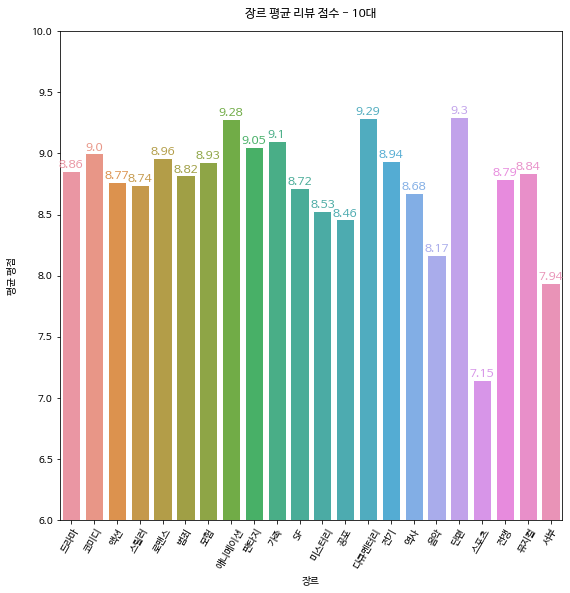

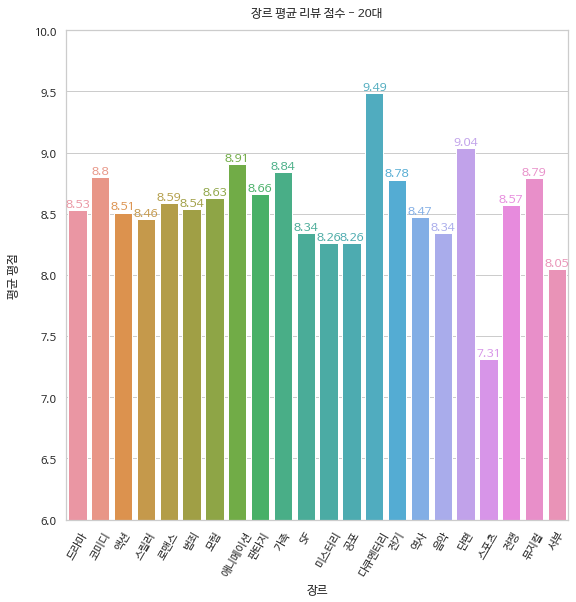

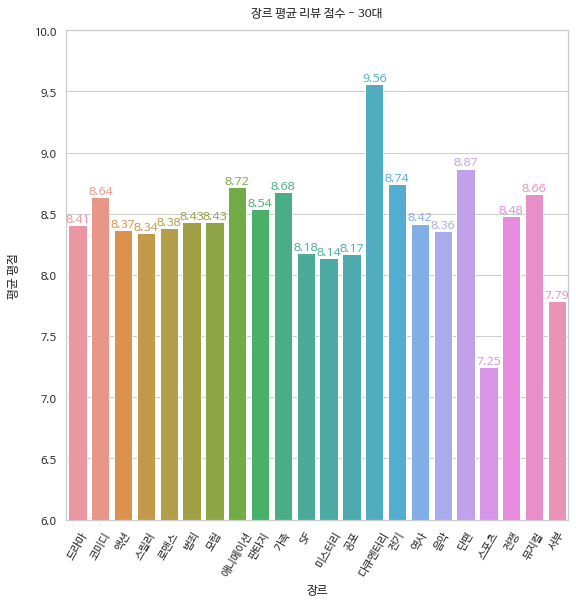

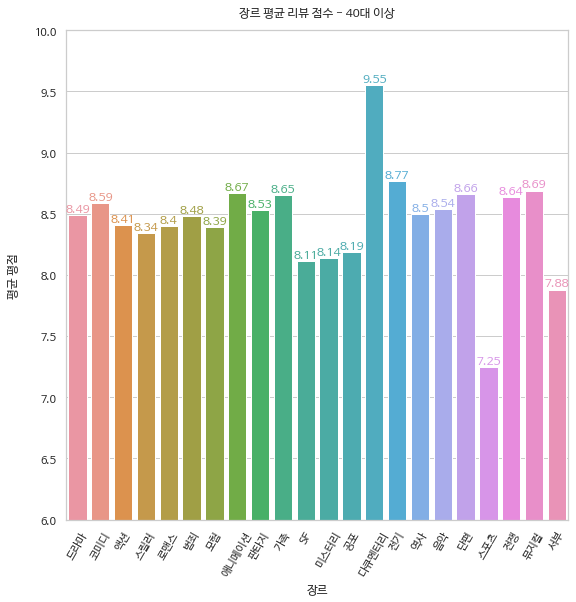

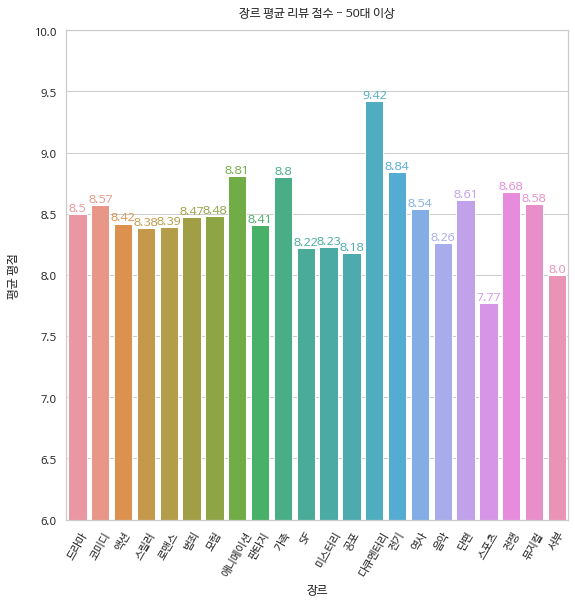

In [152]:
age_list = ['average_10s', 'average_20s', 'average_30s', 'average_40s', 'average_50_up']

# 폰트 설정
plt.rc('font', family='NanumBarunGothic') # MAC OS라면, 'AppleGothic 입력!!'

for i in range(len(age_list)):
    fig, ax = plt.subplots(figsize = (9,9))
    sns.set_theme(style="whitegrid")
    
    # age_list중 원하는 나이대의 값을 y= 에 입력
    ax = sns.barplot(x="genre", y=f"{age_list[i]}", data=movie_scores_droped_df)
    ax.tick_params(axis='x', labelrotation=60)
    plt.ylim(6,10)
    plt.rc('font', family='NanumBarunGothic') # 한글 폰트 - 오류 대비 다시 넣음
    ax.set_xlabel('장르', labelpad=5)
    ax.set_ylabel('평균 평점', labelpad=15)
    
    # 10 ~ 40대 까지의 그래프 타이틀
    if i < 3:
        ax.set_title(f'장르 평균 리뷰 점수 - {i+1}0대', pad=15)
    # 50대 이상의 그래프 타이틀
    else:
        ax.set_title(f'장르 평균 리뷰 점수 - {i+1}0대 이상', pad=15)
    
    for bar in ax.patches:
            bar_value = bar.get_height()
            if bar_value > 0:
                text = f'{round(bar_value,2):,}'
                text_y = bar.get_y() + bar_value
            else:
                text = 0
                text_y = 0

            text_x = bar.get_x() + (bar.get_width()) / 2
            bar_color = bar.get_facecolor()
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                  size=12)
    plt.show()

## bar plot genre_scores by genders

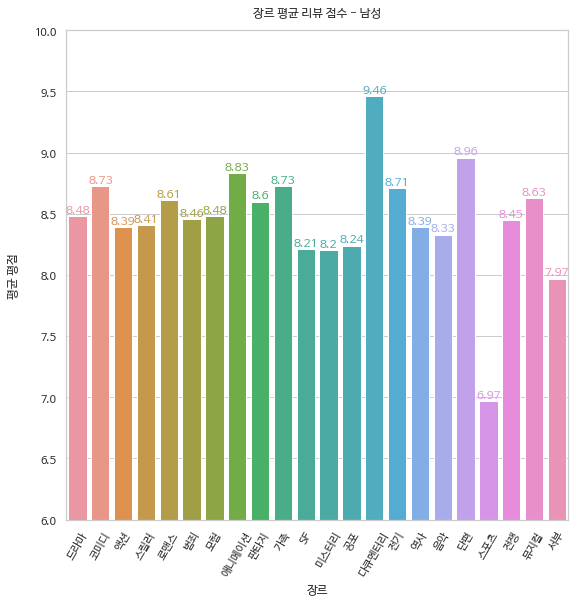

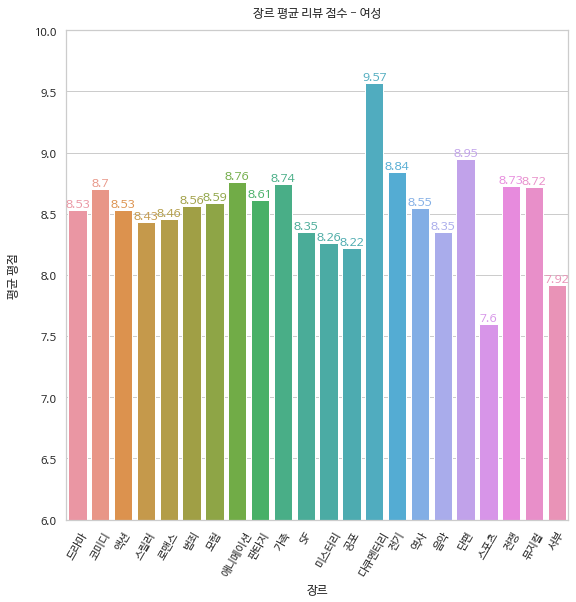

In [153]:
gender_list = ['average_male', 'average_female']

# 폰트 설정
plt.rc('font', family='NanumBarunGothic') # MAC OS라면, 'AppleGothic 입력!!'

for i in range(len(gender_list)):
    fig, ax = plt.subplots(figsize = (9,9))
    sns.set_theme(style="whitegrid")
    
    # age_list중 원하는 나이대의 값을 y= 에 입력
    ax = sns.barplot(x="genre", y=f"{gender_list[i]}", data=movie_scores_droped_df)
    ax.tick_params(axis='x', labelrotation=60)
    plt.ylim(6,10)
    plt.rc('font', family='NanumBarunGothic') # 한글 폰트 - 오류 대비 다시 넣음
    ax.set_xlabel('장르', labelpad=5)
    ax.set_ylabel('평균 평점', labelpad=15)
    
    # 남자
    if i == 0 :
        ax.set_title(f'장르 평균 리뷰 점수 - 남성', pad=15)
    # 여자
    else:
        ax.set_title(f'장르 평균 리뷰 점수 - 여성', pad=15)
    
    for bar in ax.patches:
            bar_value = bar.get_height()
            if bar_value > 0:
                text = f'{round(bar_value,2):,}'
                text_y = bar.get_y() + bar_value
            else:
                text = 0
                text_y = 0

            text_x = bar.get_x() + (bar.get_width()) / 2
            bar_color = bar.get_facecolor()
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                  size=12)
    plt.show()

## line plot - genre_scores of male

In [154]:
movie_scores_nn_df.head(1)

,genre,average_male,average_female,average_10s,average_20s,average_30s,average_40s,...,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
0,드라마,8.48,8.53,8.86,8.53,8.41,8.49,...,184030.0,198597.0,16913.0,187577.0,94243.0,61687.0,22068.0


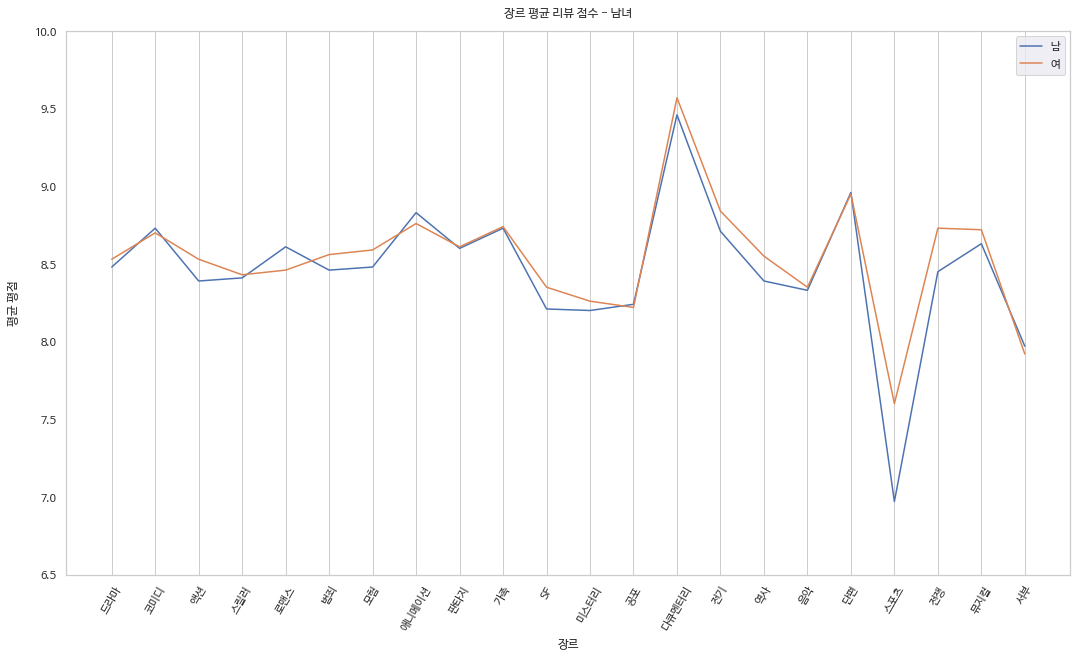

In [155]:

fig, ax = plt.subplots(figsize = (18,10))
sns.set_theme(style="darkgrid")
sns.set_palette('pastel')

# 폰트 설정
plt.rc('font', family='NanumBarunGothic') # MAC OS라면, 'AppleGothic 입력!!'

# age_list중 원하는 나이대의 값을 y= 에 입력
ax1 = sns.lineplot(x="genre", y='average_male',data=movie_scores_droped_df, palette='b', label='남')
ax2 = sns.lineplot(x="genre", y='average_female',data=movie_scores_droped_df, palette='r', label='여')
ax.tick_params(axis='x', labelrotation=60)
plt.ylim(6.5,10)
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 - 오류 대비 다시 넣음
ax.set_xlabel('장르', labelpad=5)
ax.set_ylabel('평균 평점', labelpad=15)

ax.yaxis.grid(False)


ax.set_title(f'장르 평균 리뷰 점수 - 남녀', pad=15)

# legends
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:], ['남', '여'])


for bar in ax.patches:
        bar_value = bar.get_height()
        if bar_value > 0:
            text = f'{round(bar_value,2):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0

        text_x = bar.get_x() + (bar.get_width()) / 2
        bar_color = bar.get_facecolor()
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)
plt.show()

## line plot - genre_score by ages

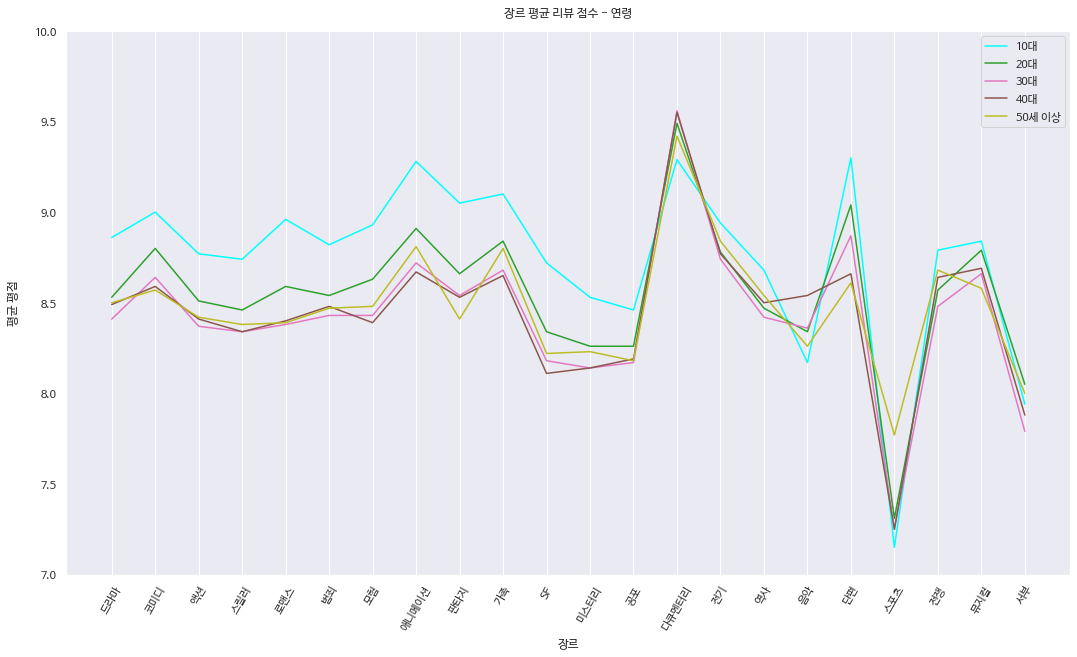

In [156]:
fig, ax = plt.subplots(figsize = (18,10))
sns.set_theme(style="darkgrid")
sns.set_palette('pastel')

# 폰트 설정
plt.rc('font', family='NanumBarunGothic') # MAC OS라면, 'AppleGothic 입력!!'
# age_list중 원하는 나이대의 값을 y= 에 입력
ax1 = sns.lineplot(x="genre", y='average_10s',data=movie_scores_droped_df, color='cyan',label='10대')
ax2 = sns.lineplot(x="genre", y='average_20s',data=movie_scores_droped_df, color='tab:green', label='20대')
ax3 = sns.lineplot(x="genre", y='average_30s',data=movie_scores_droped_df, color='tab:pink', label='30대')
ax4 = sns.lineplot(x="genre", y='average_40s',data=movie_scores_droped_df, color='tab:brown', label='40대')
ax5 = sns.lineplot(x="genre", y='average_50_up',data=movie_scores_droped_df, color='tab:olive', label='50세 이상')
ax.tick_params(axis='x', labelrotation=60)
plt.ylim(7,10)
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 - 오류 대비 다시 넣음
ax.set_xlabel('장르', labelpad=5)
ax.set_ylabel('평균 평점', labelpad=15)

ax.yaxis.grid(False)


ax.set_title(f'장르 평균 리뷰 점수 - 연령', pad=15)

# legends
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:], ['10대', '20대', '30대', '40대', '50세 이상'])


for bar in ax.patches:
        bar_value = bar.get_height()
        if bar_value > 0:
            text = f'{round(bar_value,2):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0

        text_x = bar.get_x() + (bar.get_width()) / 2
        bar_color = bar.get_facecolor()
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)
plt.show()

##  plot by genre

In [157]:
movie_scores_droped_df.columns

Index(['genre', 'average_male', 'average_female', 'average_10s', 'average_20s',
       'average_30s', 'average_40s', 'average_50_up', 'num_of_male',
       'num_of_female', 'num_of_10s', 'num_of_20s', 'num_of_30s', 'num_of_40s',
       'num_of_50_up'],
      dtype='object')

In [158]:
movie_scores_droped_df

,genre,average_male,average_female,average_10s,average_20s,average_30s,average_40s,...,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
0,드라마,8.48,8.53,8.86,8.53,8.41,8.49,...,184030.0,198597.0,16913.0,187577.0,94243.0,61687.0,22068.0
1,코미디,8.73,8.70,9.00,8.80,8.64,8.59,...,84879.0,115683.0,7371.0,88207.0,59988.0,35836.0,8827.0
2,액션,8.39,8.53,8.77,8.51,8.37,8.41,...,217289.0,215330.0,17527.0,202381.0,114351.0,76107.0,21794.0
3,스릴러,8.41,8.43,8.74,8.46,8.34,8.34,...,121561.0,117042.0,10325.0,124818.0,56996.0,35229.0,11394.0
4,로맨스,8.61,8.46,8.96,8.59,8.38,8.40,...,34835.0,43673.0,4387.0,43683.0,16949.0,9795.0,3696.0
5,범죄,8.46,8.56,8.82,8.54,8.43,8.48,...,83313.0,86605.0,6131.0,84413.0,44429.0,25938.0,8656.0
6,모험,8.48,8.59,8.93,8.63,8.43,8.39,...,97643.0,96364.0,8458.0,88962.0,56149.0,33492.0,7077.0
7,애니메이션,8.83,8.76,9.28,8.91,8.72,8.67,...,22469.0,44717.0,2769.0,17554.0,29362.0,15920.0,1530.0
8,판타지,8.60,8.61,9.05,8.66,8.54,8.53,...,55746.0,77449.0,6372.0,55475.0,40227.0,26046.0,4691.0
9,가족,8.73,8.74,9.10,8.84,8.68,8.65,...,25821.0,51928.0,2748.0,23832.0,31258.0,17712.0,2139.0


In [159]:
movie_scores_droped_df['genre'].values

array(['드라마', '코미디', '액션', '스릴러', '로맨스', '범죄', '모험', '애니메이션', '판타지', '가족',
       'SF', '미스터리', '공포', '다큐멘터리', '전기', '역사', '음악', '단편', '스포츠', '전쟁',
       '뮤지컬', '서부'], dtype=object)

In [160]:
movie_scores_droped_df.loc[[1]].T.iloc[1:8, [0]]

,1
average_male,8.73
average_female,8.7
average_10s,9.0
average_20s,8.8
average_30s,8.64
average_40s,8.59
average_50_up,8.57


C:\Users\Las\AppData\Local\Temp/ipykernel_9644/1398729201.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(9,6))


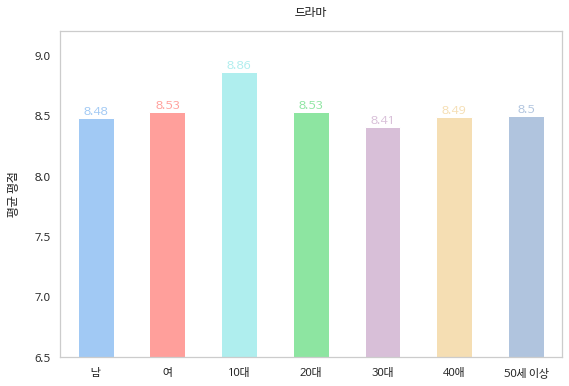

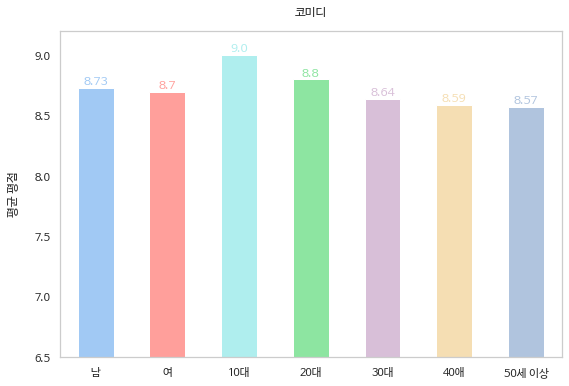

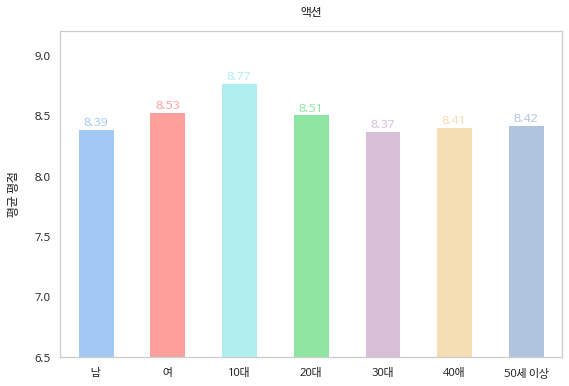

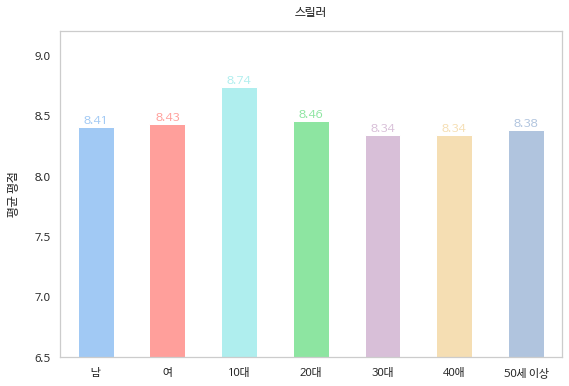

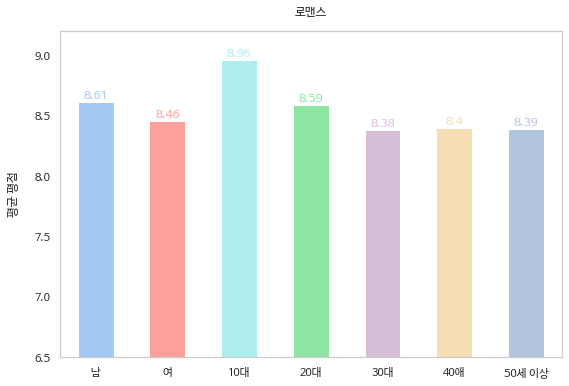

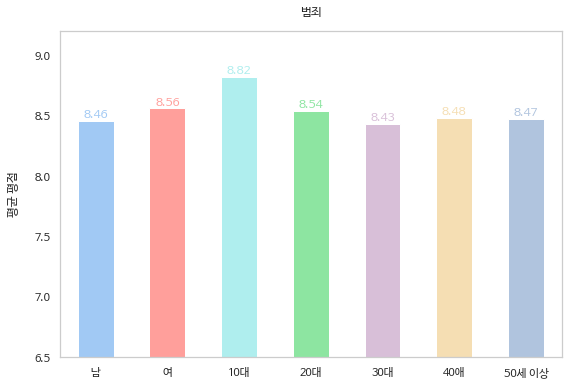

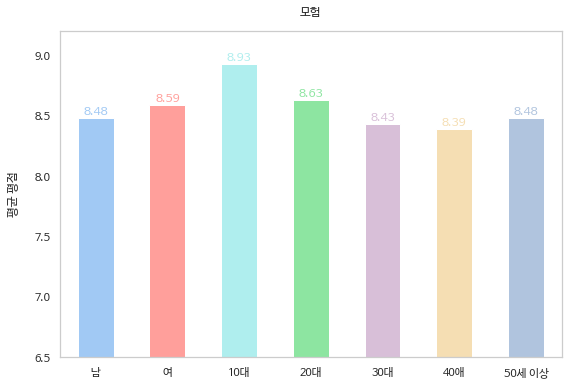

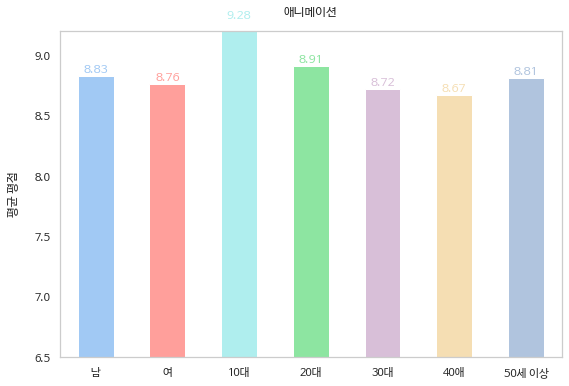

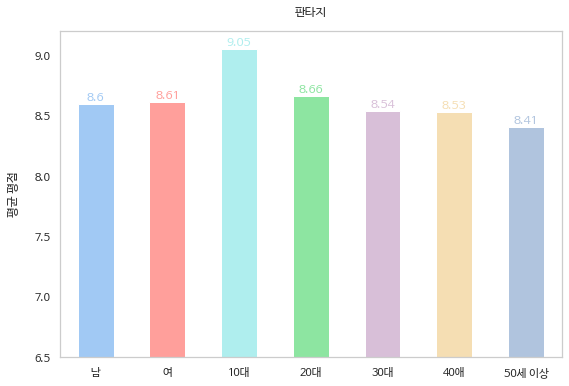

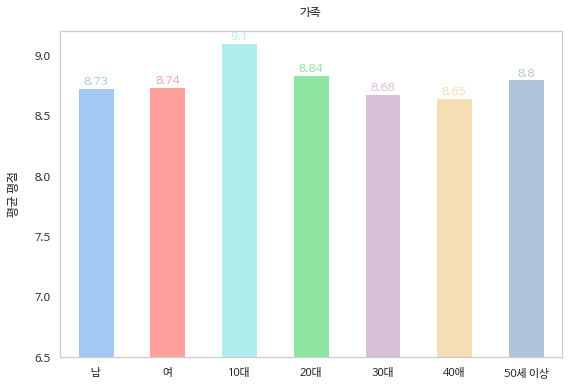

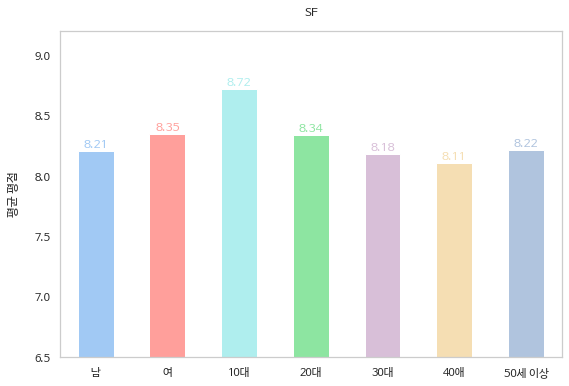

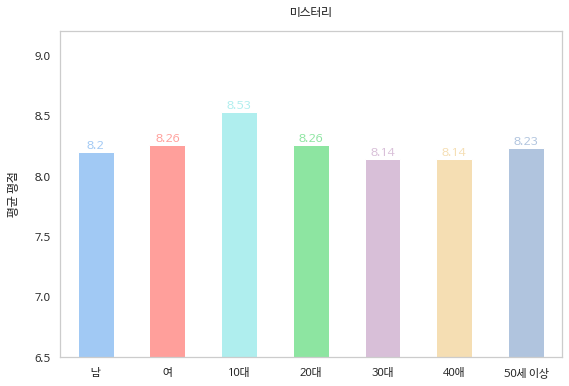

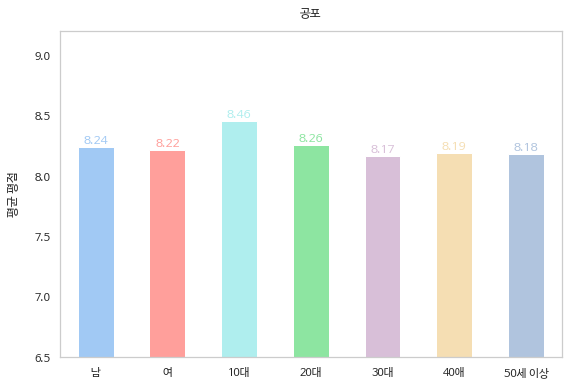

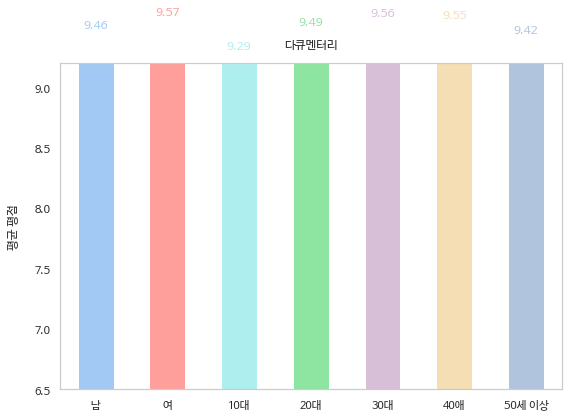

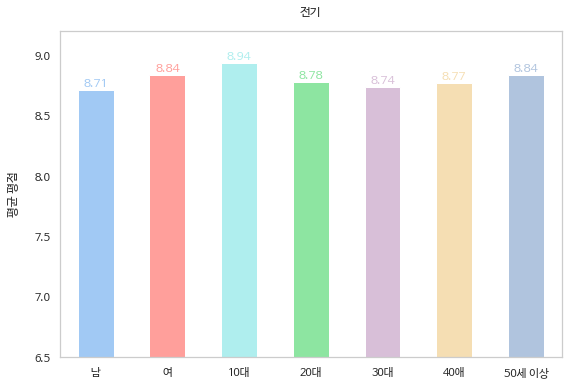

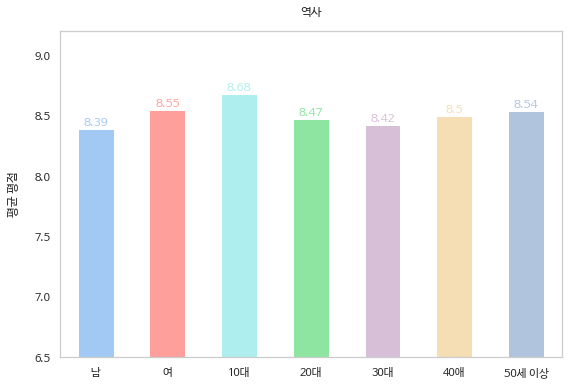

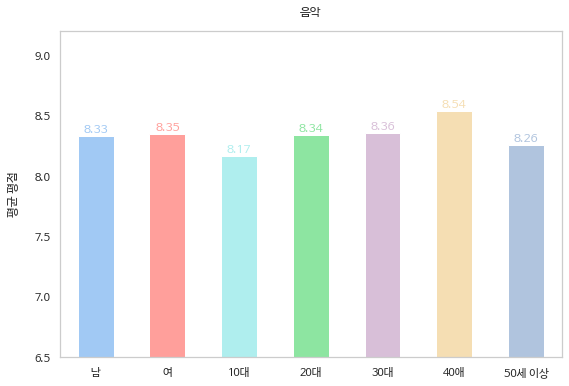

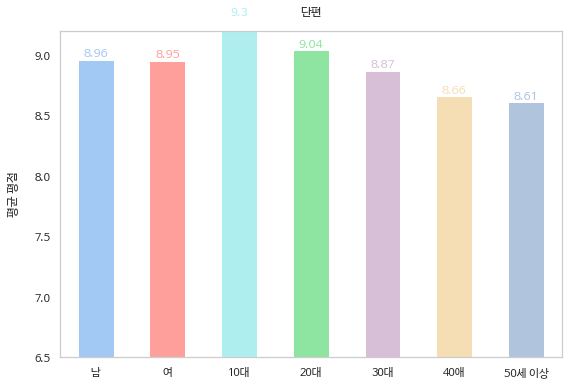

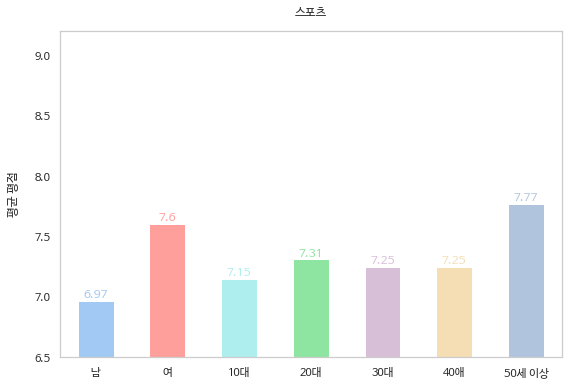

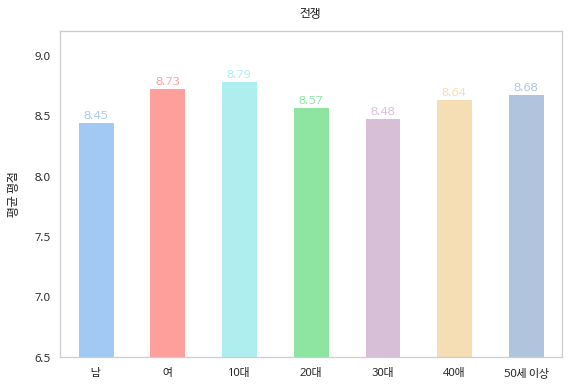

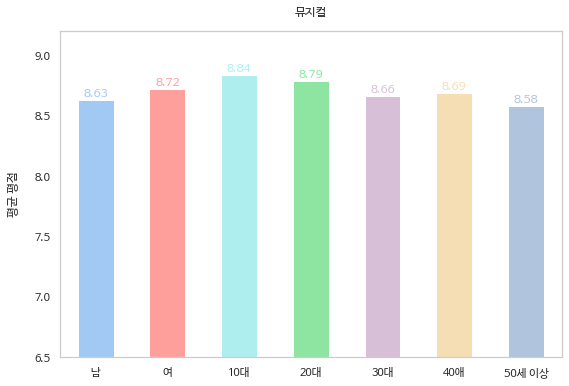

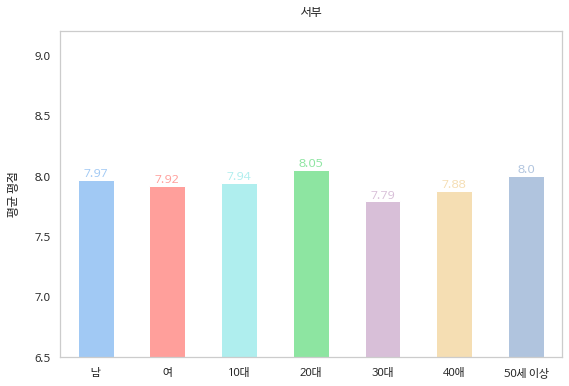

In [161]:
genre_palette = ['b', 'r', 'paleturquoise', 'g', 'thistle', 'wheat', 'lightsteelblue']
genre_list = ['드라마', '코미디', '액션', '스릴러', '로맨스', '범죄', '모험', '애니메이션', '판타지', '가족',
       'SF', '미스터리', '공포', '다큐멘터리', '전기', '역사', '음악', '단편', '스포츠', '전쟁',
       '뮤지컬', '서부']
xlabel_list = ['남', '여', '10대', '20대', '30대', '40애', '50세 이상']
sns.set_theme(style="whitegrid", palette="pastel")

for i in range(len(genre_list)):
    plt.rc('font', family='NanumBarunGothic')
#     sns.set_theme(style="whitegrid", palette="pastel")
    fig, ax = plt.subplots(figsize=(9,6))
    movie_scores_droped_df.loc[[i]].T.iloc[1:8, [0]][i].plot(kind='bar', color=genre_palette)

    # 제목 설정
    ax.set_title(f'{genre_list[i]}', pad=15)
    # y label 설정
    ax.set_ylabel('평균 평점', labelpad=15)
    
    # x 축의 각 컬럼 값 라벨 변경
    ax.set_xticklabels(xlabel_list)

    # x축 컬럼 라벨 회전
    ax.tick_params(axis='x', labelrotation=0)

    # x 축 라벨 자동변환
    #     ax.set_xticklabels(xlabel_list)

    # y축 값 결정
    plt.ylim(6.5,9.2)
    
    # 축 그리드 없애기
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    # legend
    #     ax.legend(loc='upper left')

    for bar in ax.patches:
        # The text annotation for each bar should be its height.
        bar_value = bar.get_height()
        # Format the text with commas to separate thousands. You can do
        # any type of formatting here though.
        if bar_value > 0:
            text = f'{round(bar_value,2):,}'
            text_y = bar.get_y() + bar_value
        else:
            text = 0
            text_y = 0

        text_x = bar.get_x() + bar.get_width() / 2

        bar_color = bar.get_facecolor()
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
              size=12)

## 

In [162]:
movie_scores_nn_df.drop([21, 23, 24]).head(5)

,genre,average_male,average_female,average_10s,average_20s,average_30s,average_40s,...,num_of_male,num_of_female,num_of_10s,num_of_20s,num_of_30s,num_of_40s,num_of_50_up
0,드라마,8.48,8.53,8.86,8.53,8.41,8.49,...,184030.0,198597.0,16913.0,187577.0,94243.0,61687.0,22068.0
1,코미디,8.73,8.70,9.00,8.80,8.64,8.59,...,84879.0,115683.0,7371.0,88207.0,59988.0,35836.0,8827.0
2,액션,8.39,8.53,8.77,8.51,8.37,8.41,...,217289.0,215330.0,17527.0,202381.0,114351.0,76107.0,21794.0
3,스릴러,8.41,8.43,8.74,8.46,8.34,8.34,...,121561.0,117042.0,10325.0,124818.0,56996.0,35229.0,11394.0
4,로맨스,8.61,8.46,8.96,8.59,8.38,8.40,...,34835.0,43673.0,4387.0,43683.0,16949.0,9795.0,3696.0


C:\Users\Las\AppData\Local\Temp/ipykernel_9644/844279974.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(9,6))


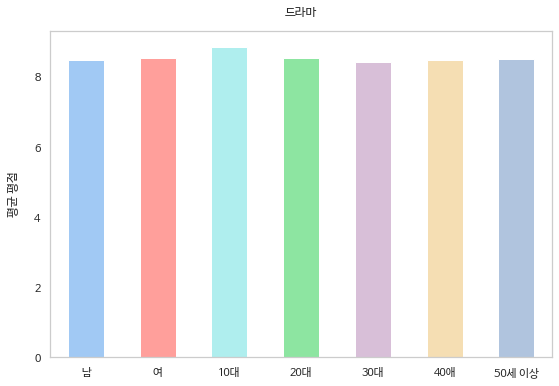

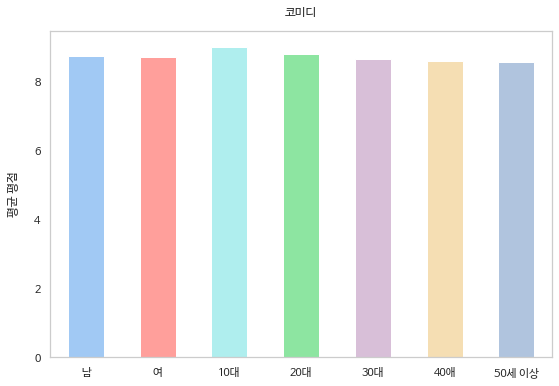

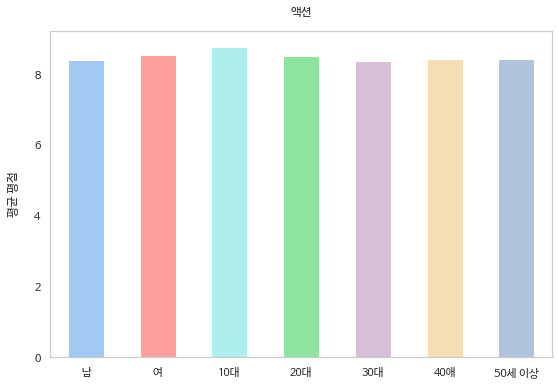

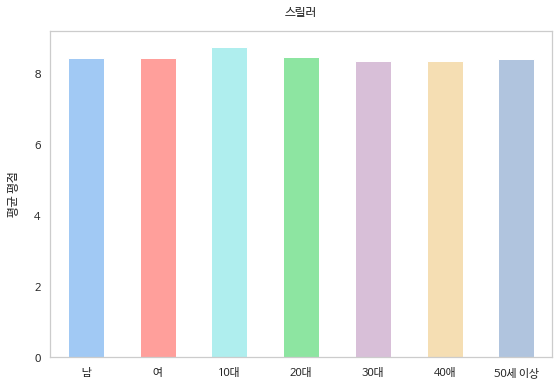

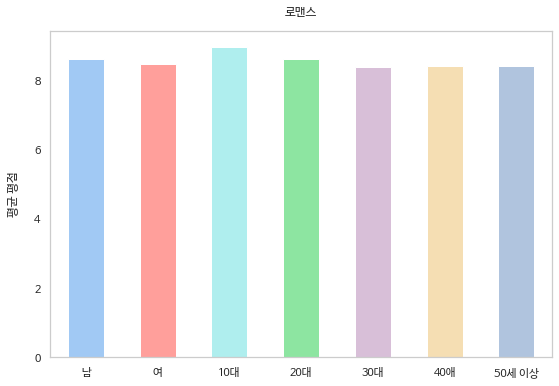

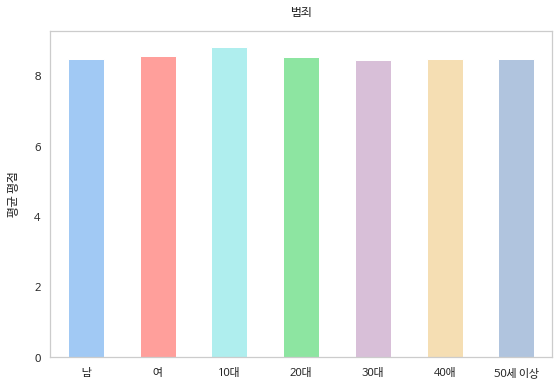

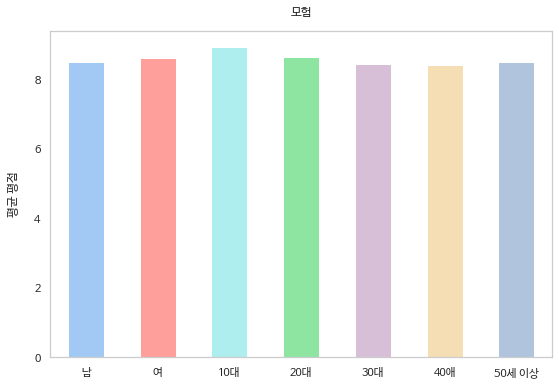

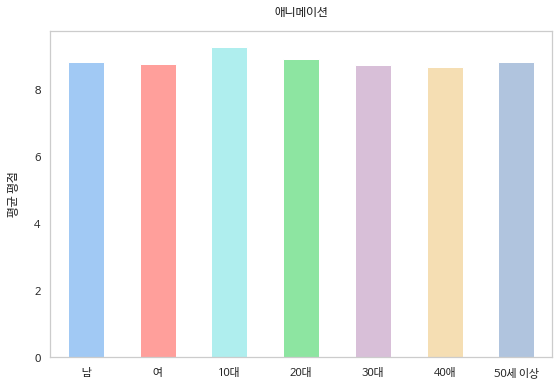

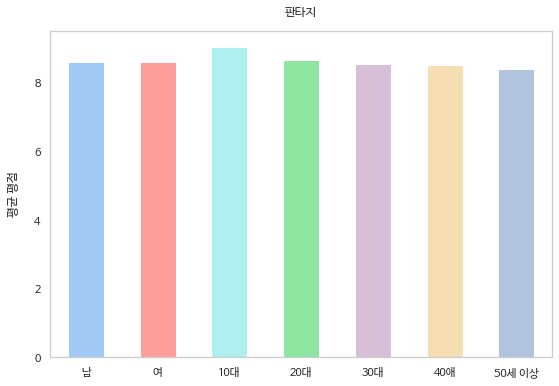

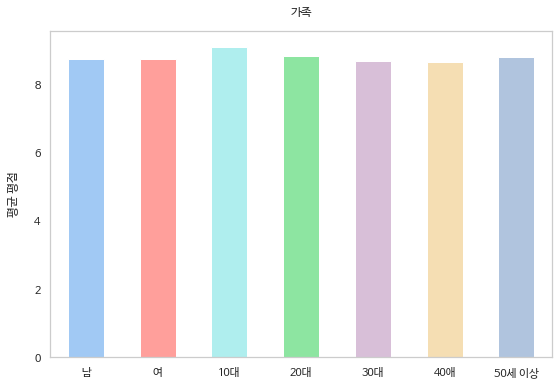

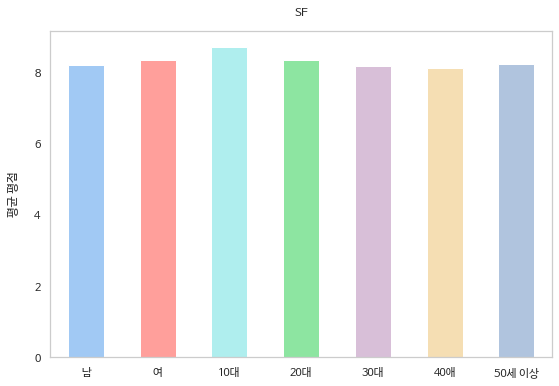

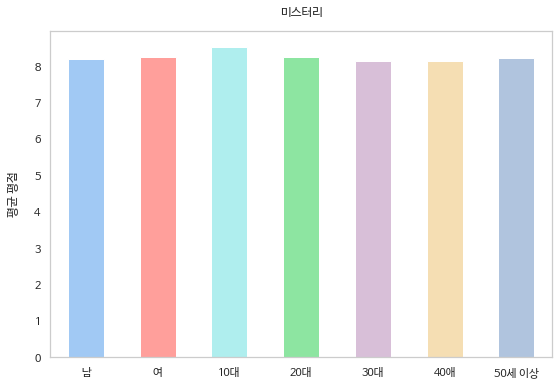

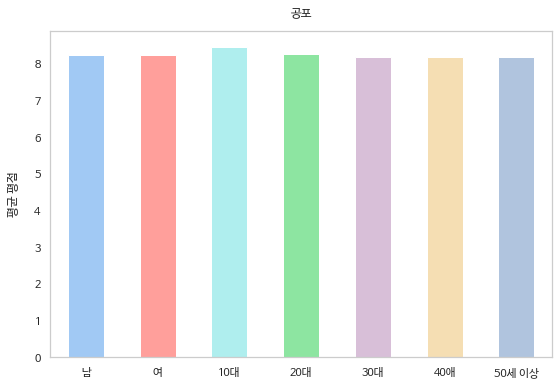

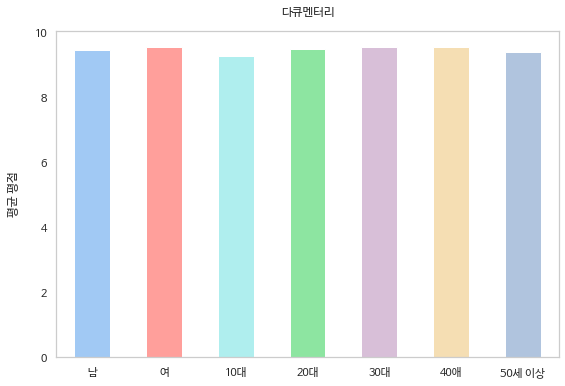

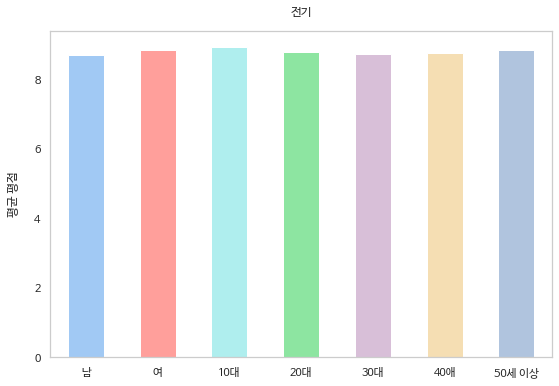

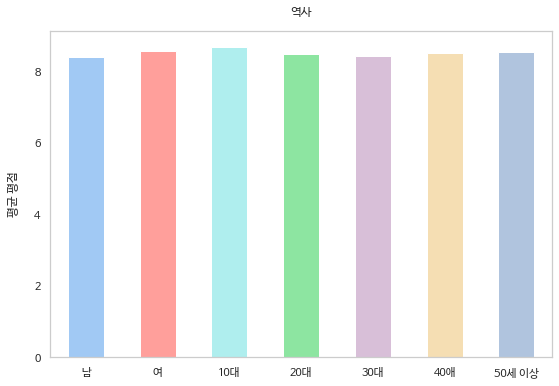

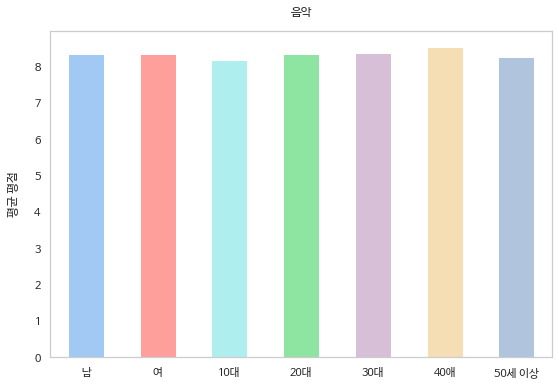

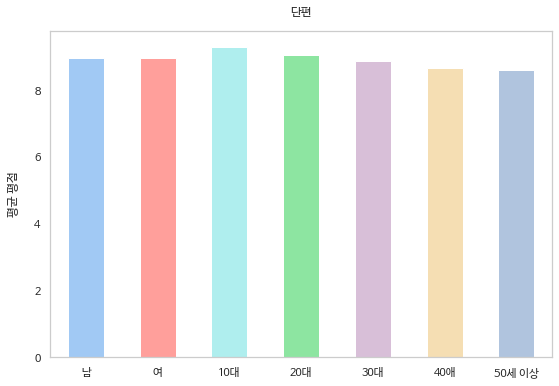

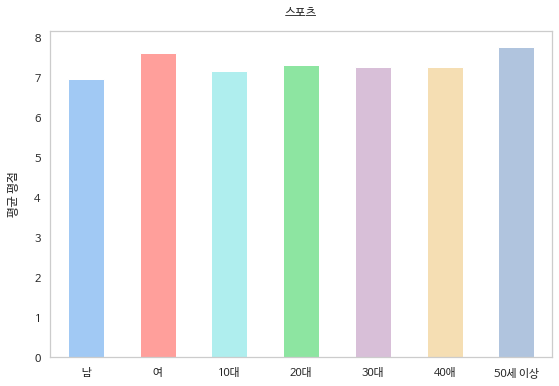

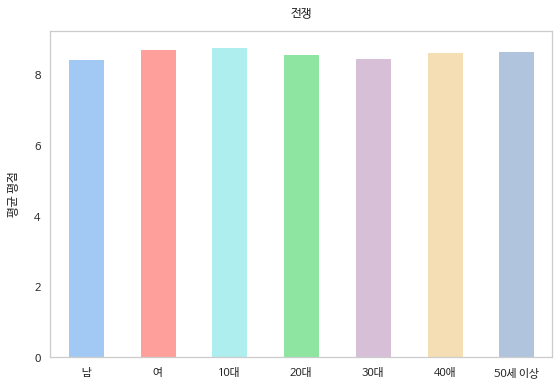

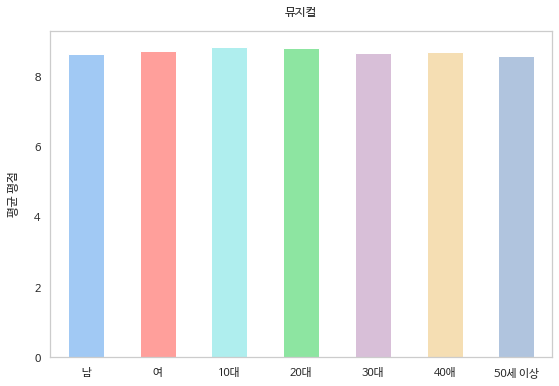

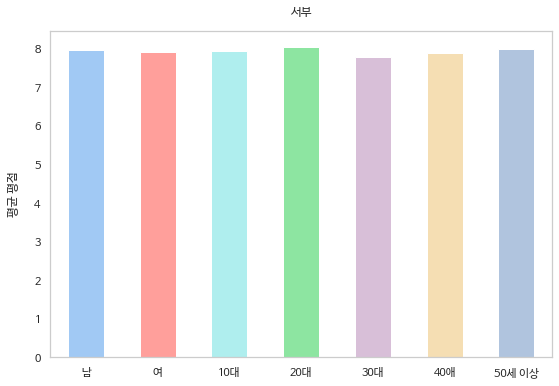

In [163]:
sns.set_theme(style="whitegrid", palette="pastel")

for i in range(len(genre_list)):
    plt.rc('font', family='NanumBarunGothic')
#     sns.set_theme(style="whitegrid", palette="pastel")
    fig, ax = plt.subplots(figsize=(9,6))
    movie_scores_droped_df.loc[[i]].T.iloc[1:8, [0]][i].plot(kind='bar', color=genre_palette)

    # 제목 설정
    ax.set_title(f'{genre_list[i]}', pad=15)
    # y label 설정
    ax.set_ylabel('평균 평점', labelpad=15)
    
    # x 축의 각 컬럼 값 라벨
    ax.set_xticklabels(xlabel_list)

    # x축 컬럼 라벨 회전
    ax.tick_params(axis='x', labelrotation=0)

    # x 축 라벨 자동변환
    #     ax.set_xticklabels(xlabel_list)



    # 축 그리드 없애기
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

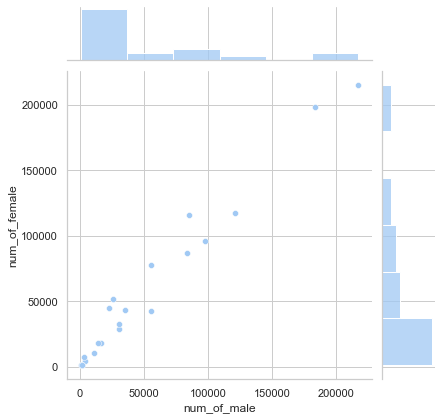

In [164]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.jointplot(data=movie_scores_nn_df.drop([21, 23, 24]), x="num_of_male", y="num_of_female")


In [165]:
sns.set_theme(style="whitegrid", palette="pastel")

Text(24.5, 0.5, '여성 (명)')

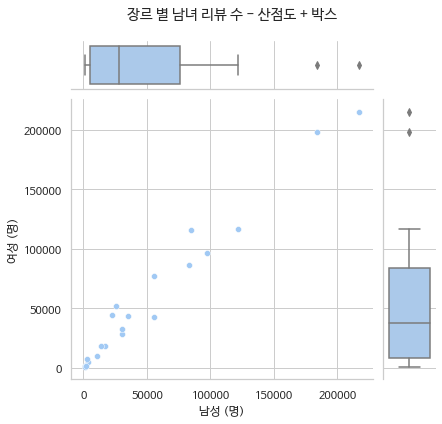

In [166]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rc('font', family='NanumBarunGothic')
g = sns.JointGrid(data=movie_scores_droped_df, x="num_of_male", y="num_of_female", palette='mediumslateblue')
g.plot(sns.scatterplot, sns.boxplot)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle(f'장르 별 남녀 리뷰 수 - 산점도 + 박스')
# g.ax_joint.set_xlabel('남성 (명)', fontweight='bold')
g.ax_joint.set_xlabel('남성 (명)')
g.ax_joint.set_ylabel('여성 (명)')